In [1]:
# About: {2013, 2014, 2015, 2016}
# example 

## Prepare data.

In [22]:
import pandas as pd
import datetime
import string
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure

import numpy as np
import matplotlib.pyplot as plt


## important: install the sample data that comes with Bokeh https://bokeh.pydata.org/en/0.10.0/docs/installation.html

In [3]:
# read column headings
with open ('/Users/stewarta/repos/iot-htsensor/data/columns.txt') as f:
    cols = f.readlines()
    
cols = [ln.strip() for ln in cols] 
print(cols)

['timestamp', 'Start Symbol', 'Zustand', 'Zeitstempel', 'Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Humi1', 'Humi2', 'Humi3', 'Humi4', 'Humi5', 'Humi6', 'Humi7', 'Humi8', 'Temperatur Kombisensor', 'Humid Kombisensor', 'Windgeschwindigkeit', 'Niederschlag', 'Rain', 'Stop Symbol']


In [4]:
# read data from file: parse the date after reading, just as a sanity check
df = pd.read_csv('/Users/stewarta/Documents/DATA/htsensor/raw.data', sep = ';',decimal=',', names=cols)
df.head()

,timestamp,Start Symbol,Zustand,Zeitstempel,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Humi5,Humi6,Humi7,Humi8,Temperatur Kombisensor,Humid Kombisensor,Windgeschwindigkeit,Niederschlag,Rain,Stop Symbol
0,2013-04-14 07:44:23,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2013-04-14 07:44:30,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2013-04-14 07:45:37,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2013-04-14 07:46:03,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2013-04-14 07:46:19,$1,1,NaN,10.1,19.6,23.0,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093567 entries, 0 to 1093566
Data columns (total 26 columns):
timestamp                 1093567 non-null object
Start Symbol              1093567 non-null object
Zustand                   1093567 non-null int64
Zeitstempel               0 non-null float64
Temp1                     1089409 non-null float64
Temp2                     1029527 non-null float64
Temp3                     787389 non-null float64
Temp4                     679930 non-null float64
Temp5                     14 non-null float64
Temp6                     28 non-null float64
Temp7                     0 non-null float64
Temp8                     893742 non-null float64
Humi1                     1089403 non-null float64
Humi2                     1029531 non-null float64
Humi3                     787386 non-null float64
Humi4                     679935 non-null float64
Humi5                     60 non-null float64
Humi6                     87 non-null float64
Humi7     

In [6]:
#select relevant columns
df = df[['timestamp','Temp1', 'Temp2', 'Temp3', 'Temp4','Temp8','Humi1', 'Humi2', 'Humi3', 'Humi4']]
df.head()

,timestamp,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
0,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
1,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
3,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
4,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


In [7]:
# parse date and insert as new column
df.insert(1, 'datetime', pd.to_datetime(df.timestamp, errors='coerce')) # If ‘coerce’, then invalid parsing will be set as NaT
df.head()

,timestamp,datetime,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
0,2013-04-14 07:44:23,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
1,2013-04-14 07:44:30,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2,2013-04-14 07:45:37,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
3,2013-04-14 07:46:03,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
4,2013-04-14 07:46:19,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


In [8]:
df.set_index('datetime', inplace=True)
df.head()

,timestamp,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,,
2013-04-14 07:44:23,2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:44:30,2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:45:37,2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:03,2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:19,2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


In [9]:
rs = df[['Temp1', 'Temp2', 'Temp3', 'Temp4', 
         'Humi1', 'Humi2', 'Humi3', 'Humi4']].resample('H').mean()
rs.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874


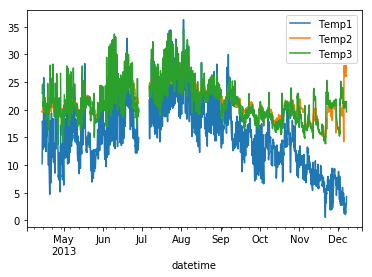

In [10]:
# Which Sensor do you think was located outside?
rs[rs.index.year==2013].loc[:, ['Temp1','Temp2','Temp3']].plot()

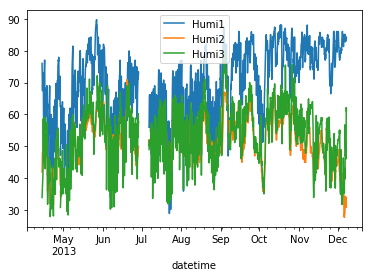

In [11]:
rs[rs.index.year==2013].loc[:, ['Humi1','Humi2','Humi3']].plot()

In [12]:
# Temperature Sensor 1: Overview
COL = 'Temp1'

dates = rs.index.values
source = ColumnDataSource(data=dict(date=dates, close=rs[COL]))



p = figure(plot_height=300, plot_width=800, tools="", toolbar_location=None,
           x_axis_type="datetime", x_axis_location="above",
           background_fill_color="#efefef", x_range=(dates[0], dates[rs[COL].shape[0]-1]))

p.line('date', 'close', source=source)
p.yaxis.axis_label = 'Celcius'

select = figure(title="Drag the middle and edges of the selection box to change the range above",
                plot_height=130, plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "navy"
range_tool.overlay.fill_alpha = 0.2

select.line('date', 'close', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool

show(column(p, select))

In [13]:
rs.to_csv('/Users/stewarta/repos/iot-htsensor/data/temp_heat.csv')

In [14]:
# parse the DWD dataset and convert date and align with home readings 
# Format dwd: yyyymmddhh
dw = pd.read_csv('/Users/stewarta/repos/iot-htsensor/data/produkt_tu_stunde_19510101_20171231_00662.txt', sep=';')
dw.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,662,1951010101,5,-7.9,94.0,eor
1,662,1951010102,5,-7.1,93.0,eor
2,662,1951010103,5,-6.2,92.0,eor
3,662,1951010104,5,-5.9,91.0,eor
4,662,1951010105,5,-5.8,91.0,eor


In [15]:
# parse date
dw.insert(2, 'datetime', pd.to_datetime(dw['MESS_DATUM'], errors='coerce', format='%Y%m%d%H'))
dw.head()

,STATIONS_ID,MESS_DATUM,datetime,QN_9,TT_TU,RF_TU,eor
0,662,1951010101,1951-01-01 01:00:00,5,-7.9,94.0,eor
1,662,1951010102,1951-01-01 02:00:00,5,-7.1,93.0,eor
2,662,1951010103,1951-01-01 03:00:00,5,-6.2,92.0,eor
3,662,1951010104,1951-01-01 04:00:00,5,-5.9,91.0,eor
4,662,1951010105,1951-01-01 05:00:00,5,-5.8,91.0,eor


In [16]:
# create index
dw.set_index('datetime', inplace=True)
dw.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
datetime,,,,,,
1951-01-01 01:00:00,662,1951010101,5,-7.9,94.0,eor
1951-01-01 02:00:00,662,1951010102,5,-7.1,93.0,eor
1951-01-01 03:00:00,662,1951010103,5,-6.2,92.0,eor
1951-01-01 04:00:00,662,1951010104,5,-5.9,91.0,eor
1951-01-01 05:00:00,662,1951010105,5,-5.8,91.0,eor


In [17]:
# extract relevant columns and rename, subset
dw.rename(columns={'TT_TU':'D_Temp','RF_TU':'D_Humi'}, inplace=True)
dw.head()

,STATIONS_ID,MESS_DATUM,QN_9,D_Temp,D_Humi,eor
datetime,,,,,,
1951-01-01 01:00:00,662,1951010101,5,-7.9,94.0,eor
1951-01-01 02:00:00,662,1951010102,5,-7.1,93.0,eor
1951-01-01 03:00:00,662,1951010103,5,-6.2,92.0,eor
1951-01-01 04:00:00,662,1951010104,5,-5.9,91.0,eor
1951-01-01 05:00:00,662,1951010105,5,-5.8,91.0,eor


In [18]:
dw[['D_Temp', 'D_Humi']]

,D_Temp,D_Humi
datetime,,
1951-01-01 01:00:00,-7.9,94.0
1951-01-01 02:00:00,-7.1,93.0
1951-01-01 03:00:00,-6.2,92.0
1951-01-01 04:00:00,-5.9,91.0
1951-01-01 05:00:00,-5.8,91.0
1951-01-01 06:00:00,-4.9,90.0
1951-01-01 07:00:00,-3.3,89.0
1951-01-01 08:00:00,-1.8,86.0
1951-01-01 09:00:00,-2.8,83.0


In [19]:
# align dwd with home 
rs = rs.join(dw[['D_Temp', 'D_Humi']],how='left')
rs.head()

,Temp1,Temp2,Temp3,Temp4,Humi1,Humi2,Humi3,Humi4,D_Temp,D_Humi
datetime,,,,,,,,,,
2013-04-14 07:00:00,10.229167,19.600000,22.975000,20.200000,76.000000,42.000000,34.000000,40.000000,9.1,76.0
2013-04-14 08:00:00,11.390196,19.590196,23.028431,20.199020,75.460784,42.401961,34.392157,40.725490,8.8,86.0
2013-04-14 09:00:00,13.222772,19.518812,23.630693,20.179208,73.851485,43.000000,34.138614,41.000000,10.9,81.0
2013-04-14 10:00:00,14.580198,19.624752,23.916832,20.383168,73.049505,43.653465,34.415842,41.881188,13.0,70.0
2013-04-14 11:00:00,16.541748,19.560194,24.039806,20.441748,72.087379,45.203883,35.436893,42.970874,14.8,66.0


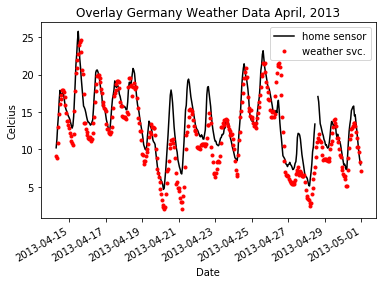

In [30]:
# overlay a sample of the Germany weather data with the home reading.

filter = (rs.index.year == 2013) & (rs.index.month == 4)
x = np.array(rs[filter].index)
y = np.array(rs[filter]['Temp1'])
y1 = np.array(rs[filter]['D_Temp'])
fig, ax = plt.subplots()
ax.set_title('Overlay Germany Weather Data April, 2013')
ax.plot(x, y, 'black', label = 'home sensor')
ax.plot(x, y1, '.', label='weather svc.', color = 'red')
fig.autofmt_xdate()
ax.set_xlabel('Date')
ax.set_ylabel('Celcius')
ax.legend(loc='best')

In [29]:
Which Sensor was positioned outside ?

SyntaxError: invalid syntax (<ipython-input-29-87fca36581f9>, line 1)